Prerana Kawade

Project 10: Random Forest - Animal Classification

In [1]:
# Supervised ML : Random Forest
import pandas as pd , numpy as np
import matplotlib.pyplot as plt , seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix , accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the dataset
df = pd.read_csv('possum.csv')
df.sample(5,random_state=44)

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
88,89,7,other,m,6.0,97.7,58.4,84.5,35.0,64.4,46.2,14.4,29.0,30.5
39,40,2,Vic,f,3.0,91.0,55.0,84.5,36.0,72.8,51.4,13.6,27.0,30.0
92,93,7,other,m,3.0,89.2,54.0,82.0,38.0,63.8,44.9,12.8,24.0,31.0
7,8,1,Vic,f,6.0,94.8,57.6,91.0,37.0,72.7,53.9,14.5,29.0,34.0
98,99,7,other,f,3.0,93.3,56.2,86.5,38.5,64.8,43.8,14.0,28.0,35.0


In [3]:
# clean up and remove any rows with missing data
df = df.dropna()

In [4]:
X = df.drop(['case','site','Pop','sex'],axis=1)
X.head()

,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0


In [5]:
y = df['sex']
y.head()

0    m
1    f
2    f
3    f
4    f
Name: sex, dtype: object

In [6]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.3,random_state=44)

In [7]:
# Training Our Random Forest model
rf_model = RandomForestClassifier(n_estimators=50,max_features='auto',random_state=44)
rf_model.fit(X_train,y_train)

RandomForestClassifier(max_features='auto', n_estimators=50, random_state=44)

In [8]:
# making predictions with our model
predictions = rf_model.predict(X_test)
predictions

array(['f', 'm', 'm', 'm', 'f', 'f', 'm', 'm', 'm', 'm', 'm', 'f', 'm',
       'm', 'm', 'm', 'm', 'f', 'm', 'm', 'm', 'f', 'f', 'm', 'm', 'm',
       'm', 'm', 'm', 'm', 'f'], dtype=object)

In [9]:
cm = confusion_matrix(y_test,predictions)
cm

array([[ 5,  9],
       [ 3, 14]])

In [10]:
accuracy = accuracy_score(y_test,predictions)
print("Accuracy :",accuracy)

Accuracy : 0.6129032258064516


In [11]:
importances = rf_model.feature_importances_
columns = X.columns
i = 0

while i<len(columns):
    print(f'The Importance Of Feature {columns[i]} is {round(importances[i]*100,2)}%.')
    i += 1

The Importance Of Feature age is 5.24%.
The Importance Of Feature hdlngth is 14.62%.
The Importance Of Feature skullw is 8.88%.
The Importance Of Feature totlngth is 11.32%.
The Importance Of Feature taill is 7.15%.
The Importance Of Feature footlgth is 16.1%.
The Importance Of Feature earconch is 11.99%.
The Importance Of Feature eye is 11.08%.
The Importance Of Feature chest is 5.29%.
The Importance Of Feature belly is 8.34%.


<Axes: >

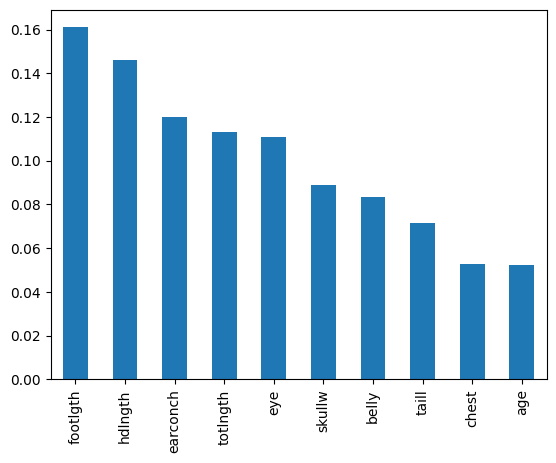

In [12]:
feature_importances = pd.Series(rf_model.feature_importances_,index=X.columns).sort_values(ascending=False)
feature_importances.plot.bar()

In [13]:
X_train.head()

,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
4,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0
78,1.0,85.8,50.0,81.0,36.5,62.8,43.0,14.8,22.0,28.5
100,1.0,88.6,54.7,82.5,39.0,64.4,48.0,14.0,25.0,33.0
0,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
91,2.0,90.7,56.3,85.0,37.0,67.6,46.8,14.5,25.5,31.0


In [14]:
y_train.head()

4      f
78     m
100    m
0      m
91     m
Name: sex, dtype: object

In [15]:
newPossum = [[2.0 ,  91.5,  56.3,  85.5,  36.0 ,  71.0 ,  53.2,  15.1,  28.5,33.0]]
rf_model.predict(newPossum)

array(['f'], dtype=object)